In [49]:
import tensorflow as tf 
from tensorflow import keras
from keras.models import Sequential
from keras.layers import Dense, Flatten, Conv2D, Dropout, MaxPooling2D
from IPython.display import SVG
from keras.utils.vis_utils import model_to_dot
from keras.utils import plot_model
from keras.utils import to_categorical
import numpy as np 
import matplotlib.pyplot as plt 
import seaborn as sns
import pandas as pd

print (tf.__version__) # 1.12.0

2.12.0


### Loading the fashion MNIST data 

In [50]:
fashion_mnist = keras.datasets.fashion_mnist
(train_images, train_labels), (test_images, test_labels) = fashion_mnist.load_data()
train_data = fashion_mnist.load_data()[0]
# returns 4 numpy arrays: 2 training sets and 2 test sets
# images: 28x28 arrays, pixel values: 0 to 255
# labels: array of integers: 0 to 9 => class of clothings
# Training set: 60,000 images, Testing set: 10,000 images

# class names are not included, need to create them to plot the images  
class_names = ['T-shirt/top', 'Trouser', 'Pullover', 'Dress', 'Coat', 'Sandal', 'Shirt', 'Sneaker', 'Bag', 'Ankle boot']


### Exploring and Visualizing the data

In [51]:
print("train_images:", train_images.shape)
print("test_images:", test_images.shape)

train_images: (60000, 28, 28)
test_images: (10000, 28, 28)


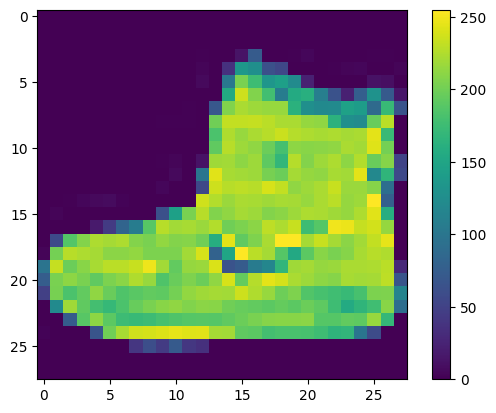

In [52]:
# Visualize the first image from the training dataset
plt.figure()
plt.imshow(train_images[0])
plt.colorbar()
plt.grid(False)

Train classes distribution

In [53]:
plot_data = []
def get_classes_distribution(train_images, train_labels):


    # Get total number of samples
    total_samples = train_images.shape[0]

    
    # Count the number of items in each class
    for i in range(len(class_names)):
        label = class_names[i]      
        #Extract all shirt indices -- to BALANCE -- shirt
        count = len([j for j, x in enumerate(train_labels) if x == i])
        percent = (count / total_samples) * 100
        plot_data.append(count)
        print("{:<20s}:   {} or {}%".format(label, count, percent))

    return  plot_data  

plot_data = get_classes_distribution(train_images, train_labels)

T-shirt/top         :   6000 or 10.0%
Trouser             :   6000 or 10.0%
Pullover            :   6000 or 10.0%
Dress               :   6000 or 10.0%
Coat                :   6000 or 10.0%
Sandal              :   6000 or 10.0%
Shirt               :   6000 or 10.0%
Sneaker             :   6000 or 10.0%
Bag                 :   6000 or 10.0%
Ankle boot          :   6000 or 10.0%


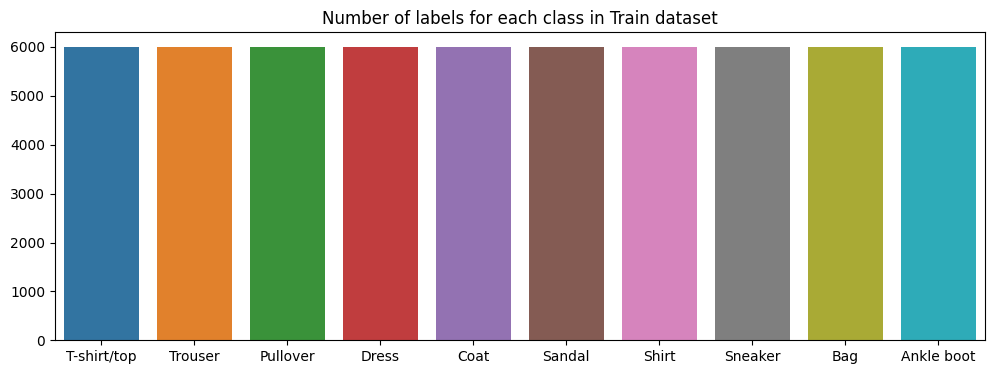

In [54]:
def plot_label_per_class(plot_data):
    f, ax = plt.subplots(1,1, figsize=(12,4))
  
    # Create barplot
    g = sns.barplot(x=class_names, y=plot_data, ax=ax)
    
    #g = sns.countplot(data = df)
    g.set_title("Number of labels for each class in Train dataset")
    plt.show()  
    
plot_label_per_class(plot_data)

Test classes distribution

In [55]:
plot_data = []
def get_classes_distribution(train_images, train_labels):


    # Get total number of samples
    total_samples = test_images.shape[0]

    
    # Count the number of items in each class
    for i in range(len(class_names)):
        label = class_names[i]      
        #Extract all shirt indices -- to BALANCE -- shirt
        count = len([j for j, x in enumerate(test_labels) if x == i])
        percent = (count / total_samples) * 100
        plot_data.append(count)
        print("{:<20s}:   {} or {}%".format(label, count, percent))

    return  plot_data  

plot_data = get_classes_distribution(test_images, test_labels)

T-shirt/top         :   1000 or 10.0%
Trouser             :   1000 or 10.0%
Pullover            :   1000 or 10.0%
Dress               :   1000 or 10.0%
Coat                :   1000 or 10.0%
Sandal              :   1000 or 10.0%
Shirt               :   1000 or 10.0%
Sneaker             :   1000 or 10.0%
Bag                 :   1000 or 10.0%
Ankle boot          :   1000 or 10.0%


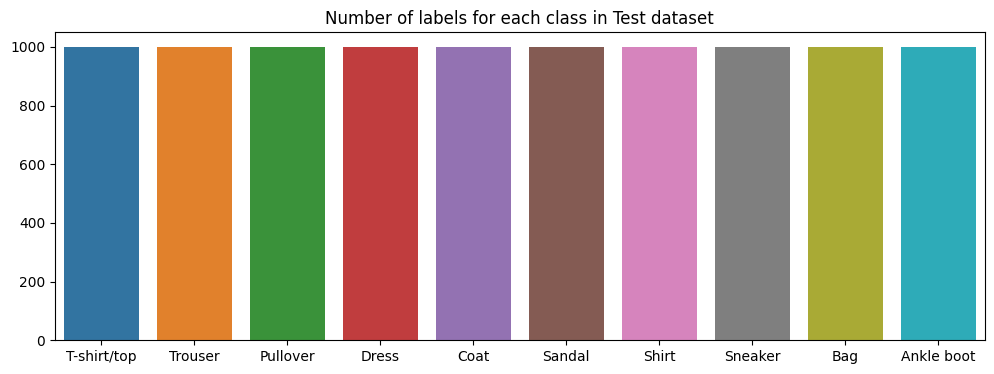

In [56]:
def plot_label_per_class(plot_data):
    f, ax = plt.subplots(1,1, figsize=(12,4))
  
    # Create barplot
    g = sns.barplot(x=class_names, y=plot_data, ax=ax)
    
    #g = sns.countplot(data = df)
    g.set_title("Number of labels for each class in Test dataset")
    plt.show()  
    
plot_label_per_class(plot_data)

### Normalizing the data 

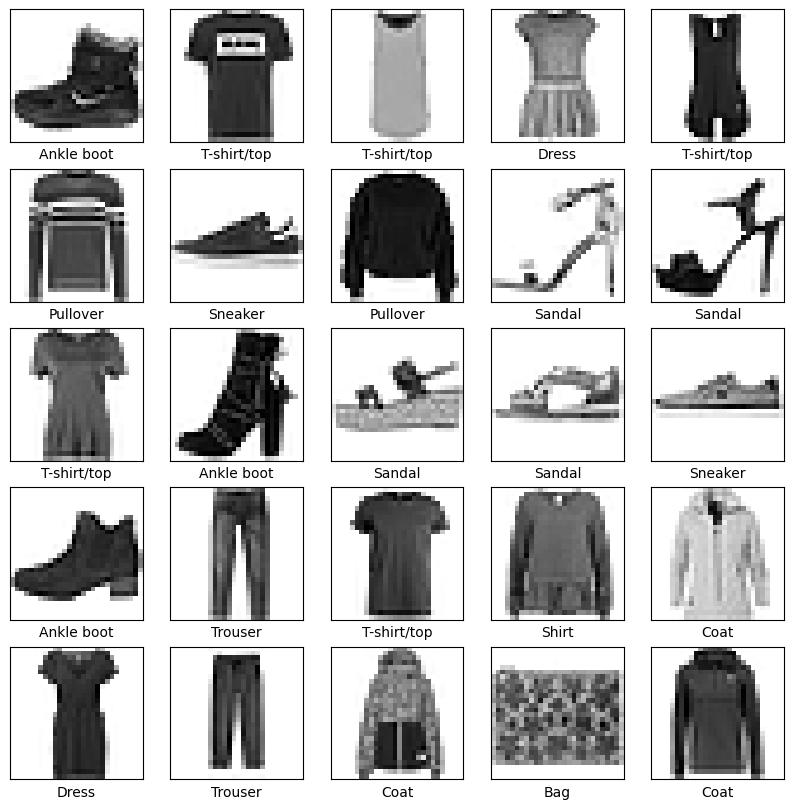

In [57]:
# display the first 25 images from the training set and 
# display the class name below each image
# verify that data is in correct format
plt.figure(figsize=(10,10))
for i in range(25):
	plt.subplot(5,5, i+1)
	plt.xticks([])
	plt.yticks([])
	plt.grid(False)
	plt.imshow(train_images[i], cmap=plt.cm.binary)
	plt.xlabel(class_names[train_labels[i]])
	

In [58]:
def data_preprocessing(images, labels):
    out_y = to_categorical(labels, 10)
    num_images = images.shape[0]
    x_shaped_array = images.reshape(num_images, 28, 28, 1)
    out_x = x_shaped_array / 255
    out_x = np.repeat(out_x, 3, axis=3)  # Expand to shape (num_samples, 28, 28, 3)
    out_x  = np.pad(out_x, [(0, 0), (2, 2), (2, 2), (0, 0)], mode='constant')  # Pad to shape (num_samples, 32, 32, 3)

    return out_x, out_y

In [59]:
# prepare the data
train_images, train_labels = data_preprocessing(train_images, train_labels)
test_images, test_labels = data_preprocessing(test_images, test_labels)

In [60]:
train_images.shape

(60000, 32, 32, 3)

In [61]:
train_labels.shape

(60000, 10)

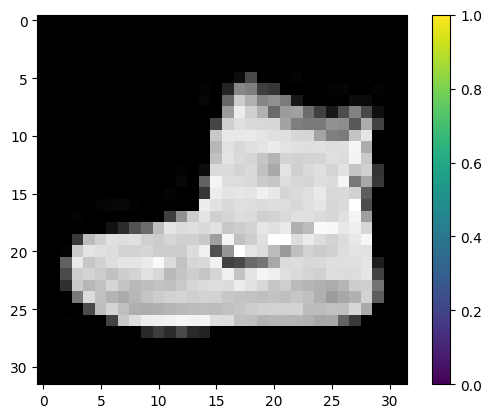

In [62]:
# Visualize the first image from the training dataset
plt.figure()
plt.imshow(train_images[0])
plt.colorbar()
plt.grid(False)

# **feature extraction**

In [63]:
from keras.applications.vgg16 import VGG16

conv_base = VGG16(weights="imagenet", include_top=False, input_shape=(32, 32, 3))

In [64]:
from keras import models
from keras import layers
from keras.preprocessing.image import ImageDataGenerator
from keras import optimizers

In [18]:
conv_base.trainable = False

model_CNN = models.Sequential([
   conv_base,
   layers.Flatten(),
   layers.Dense(128, activation="relu"),
   layers.Dense(10, activation="softmax"),
])

In [19]:
model_CNN.compile(loss=keras.losses.categorical_crossentropy,
              optimizer='adam',
              metrics=['accuracy'])

In [20]:
model_CNN.summary() 

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 vgg16 (Functional)          (None, 1, 1, 512)         14714688  
                                                                 
 flatten (Flatten)           (None, 512)               0         
                                                                 
 dense (Dense)               (None, 128)               65664     
                                                                 
 dense_1 (Dense)             (None, 10)                1290      
                                                                 
Total params: 14,781,642
Trainable params: 66,954
Non-trainable params: 14,714,688
_________________________________________________________________


In [25]:
# History
history_CNN=model_CNN.fit(train_images, train_labels, epochs=10, batch_size=128, verbose=1, validation_split=0.2)

test_loss, test_acc = model_CNN.evaluate(test_images, test_labels)
print("Model - 12 layers - test loss:", test_loss * 100)
print("Model - 12 layers - test accuracy:", test_acc * 100)


Epoch 1/10
375/375 [==============================] - 1224s 3s/step - loss: 0.3437 - accuracy: 0.8745 - val_loss: 0.3855 - val_accuracy: 0.8616
Epoch 2/10
375/375 [==============================] - 1218s 3s/step - loss: 0.3338 - accuracy: 0.8773 - val_loss: 0.3685 - val_accuracy: 0.8667
Epoch 3/10
375/375 [==============================] - 1212s 3s/step - loss: 0.3265 - accuracy: 0.8814 - val_loss: 0.3713 - val_accuracy: 0.8662
Epoch 4/10
375/375 [==============================] - 1214s 3s/step - loss: 0.3205 - accuracy: 0.8821 - val_loss: 0.3646 - val_accuracy: 0.8658
Epoch 5/10
375/375 [==============================] - 1212s 3s/step - loss: 0.3145 - accuracy: 0.8840 - val_loss: 0.3659 - val_accuracy: 0.8681
Epoch 6/10
375/375 [==============================] - 1214s 3s/step - loss: 0.3092 - accuracy: 0.8875 - val_loss: 0.3736 - val_accuracy: 0.8653
Epoch 7/10
375/375 [==============================] - 1216s 3s/step - loss: 0.3028 - accuracy: 0.8884 - val_loss: 0.3591 - val_accuracy:

In [66]:
# Load model
model_CNN = tf.keras.models.load_model('fashion_MNIST_VGG16')


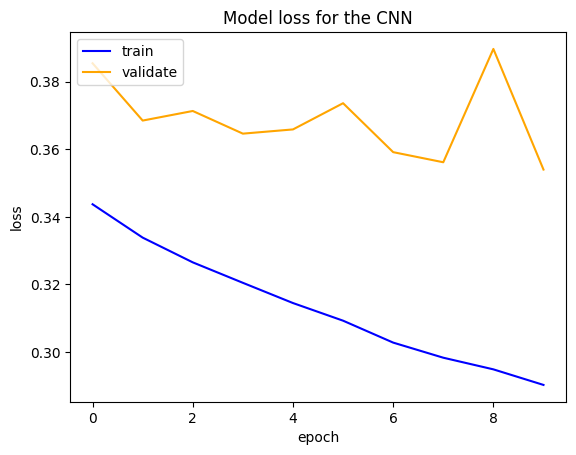

In [67]:
#Plot loss results for training data and testing data
plt.plot(history_CNN.history['loss'], 'blue')
plt.plot(history_CNN.history['val_loss'], 'orange')
plt.title('Model loss for the CNN')
plt.ylabel('loss')
plt.xlabel('epoch')
plt.legend(['train', 'validate'], loc='upper left')


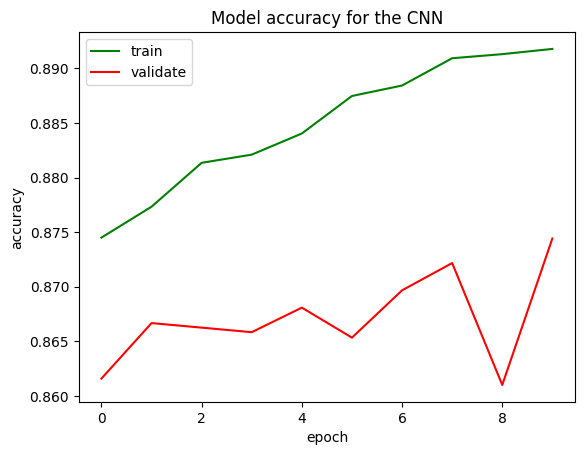

In [68]:
#Plot accuracy results for training data and testing data 
plt.plot(history_CNN.history['accuracy'], 'green')
plt.plot(history_CNN.history['val_accuracy'], 'red')
plt.title('Model accuracy for the CNN')
plt.ylabel('accuracy')
plt.xlabel('epoch')
plt.legend(['train', 'validate'], loc='upper left')

In [29]:
# Save model
#model_CNN.save('fashion_MNIST_VGG16')

INFO:tensorflow:Assets written to: fashion_MNIST_VGG16\assets


INFO:tensorflow:Assets written to: fashion_MNIST_VGG16\assets


# **fine-tuning**

In [79]:
(train_images, train_labels), (test_images, test_labels) = fashion_mnist.load_data()

In [80]:
# prepare the data
train_images, train_labels = data_preprocessing(train_images, train_labels)
test_images, test_labels = data_preprocessing(test_images, test_labels)

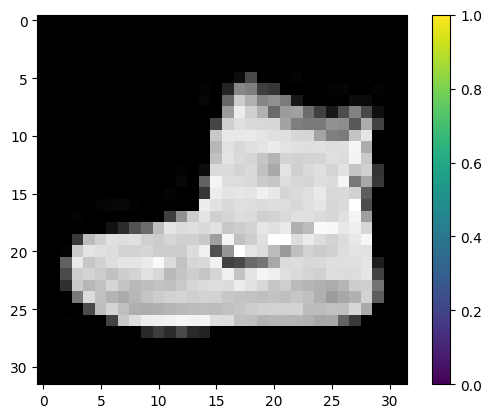

In [81]:
# Visualize the first image from the training dataset
plt.figure()
plt.imshow(train_images[0])
plt.colorbar()
plt.grid(False)

In [83]:
conv_base.summary()

Model: "vgg16"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 input_2 (InputLayer)        [(None, 32, 32, 3)]       0         
                                                                 
 block1_conv1 (Conv2D)       (None, 32, 32, 64)        1792      
                                                                 
 block1_conv2 (Conv2D)       (None, 32, 32, 64)        36928     
                                                                 
 block1_pool (MaxPooling2D)  (None, 16, 16, 64)        0         
                                                                 
 block2_conv1 (Conv2D)       (None, 16, 16, 128)       73856     
                                                                 
 block2_conv2 (Conv2D)       (None, 16, 16, 128)       147584    
                                                                 
 block2_pool (MaxPooling2D)  (None, 8, 8, 128)         0     

In [84]:
conv_base.trainable = True
set_trainable = False
for layer in conv_base.layers:
    if layer.name == "block5_conv1":
        set_trainable = True
    if set_trainable:
        layer.trainable = True
    else:
        layer.trainable = False

In [85]:
conv_base.summary()

Model: "vgg16"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 input_2 (InputLayer)        [(None, 32, 32, 3)]       0         
                                                                 
 block1_conv1 (Conv2D)       (None, 32, 32, 64)        1792      
                                                                 
 block1_conv2 (Conv2D)       (None, 32, 32, 64)        36928     
                                                                 
 block1_pool (MaxPooling2D)  (None, 16, 16, 64)        0         
                                                                 
 block2_conv1 (Conv2D)       (None, 16, 16, 128)       73856     
                                                                 
 block2_conv2 (Conv2D)       (None, 16, 16, 128)       147584    
                                                                 
 block2_pool (MaxPooling2D)  (None, 8, 8, 128)         0     

In [86]:
model_CNN.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 vgg16 (Functional)          (None, 1, 1, 512)         14714688  
                                                                 
 flatten (Flatten)           (None, 512)               0         
                                                                 
 dense (Dense)               (None, 128)               65664     
                                                                 
 dense_1 (Dense)             (None, 10)                1290      
                                                                 
Total params: 14,781,642
Trainable params: 66,954
Non-trainable params: 14,714,688
_________________________________________________________________


In [87]:
model_CNN.compile(loss=keras.losses.categorical_crossentropy,
              optimizer='adam',
              metrics=['accuracy'])

In [88]:
# History
history_CNN_2=model_CNN.fit(train_images, train_labels, epochs=10, batch_size=128, verbose=1, validation_split=0.2)

test_loss, test_acc = model_CNN.evaluate(test_images, test_labels)
print("Model - 12 layers - test loss:", test_loss * 100)
print("Model - 12 layers - test accuracy:", test_acc * 100)

Epoch 1/10
375/375 [==============================] - 634s 2s/step - loss: 0.2513 - accuracy: 0.9078 - val_loss: 0.3517 - val_accuracy: 0.8773
Epoch 2/10
375/375 [==============================] - 644s 2s/step - loss: 0.2488 - accuracy: 0.9088 - val_loss: 0.3522 - val_accuracy: 0.8773
Epoch 3/10
375/375 [==============================] - 632s 2s/step - loss: 0.2441 - accuracy: 0.9101 - val_loss: 0.3530 - val_accuracy: 0.8751
Epoch 4/10
375/375 [==============================] - 626s 2s/step - loss: 0.2414 - accuracy: 0.9105 - val_loss: 0.3476 - val_accuracy: 0.8774
Epoch 5/10
375/375 [==============================] - 639s 2s/step - loss: 0.2363 - accuracy: 0.9135 - val_loss: 0.3522 - val_accuracy: 0.8763
Epoch 6/10
375/375 [==============================] - 630s 2s/step - loss: 0.2345 - accuracy: 0.9132 - val_loss: 0.3562 - val_accuracy: 0.8748
Epoch 7/10
375/375 [==============================] - 655s 2s/step - loss: 0.2323 - accuracy: 0.9139 - val_loss: 0.3573 - val_accuracy: 0.8759

In [90]:
# History
history_CNN_2=model_CNN.fit(train_images, train_labels, epochs=5, batch_size=480, verbose=1, validation_split=0.2)

test_loss, test_acc = model_CNN.evaluate(test_images, test_labels)
print("Model - 12 layers - test loss:", test_loss * 100)
print("Model - 12 layers - test accuracy:", test_acc * 100)

Epoch 1/5
100/100 [==============================] - 620s 6s/step - loss: 0.2063 - accuracy: 0.9255 - val_loss: 0.3394 - val_accuracy: 0.8827
Epoch 2/5
100/100 [==============================] - 617s 6s/step - loss: 0.2019 - accuracy: 0.9271 - val_loss: 0.3417 - val_accuracy: 0.8806
Epoch 3/5
100/100 [==============================] - 616s 6s/step - loss: 0.2006 - accuracy: 0.9279 - val_loss: 0.3421 - val_accuracy: 0.8804
Epoch 4/5
100/100 [==============================] - 615s 6s/step - loss: 0.1996 - accuracy: 0.9284 - val_loss: 0.3449 - val_accuracy: 0.8791
Epoch 5/5
313/313 [==============================] - 111s 354ms/step - loss: 0.3560 - accuracy: 0.8784
Model - 12 layers - test loss: 35.59620678424835
Model - 12 layers - test accuracy: 87.84000277519226


In [94]:
# Save model
model_CNN.save('fashion_MNIST_VGG16_fine_tune')

INFO:tensorflow:Assets written to: fashion_MNIST_VGG16_fine_tune\assets


INFO:tensorflow:Assets written to: fashion_MNIST_VGG16_fine_tune\assets


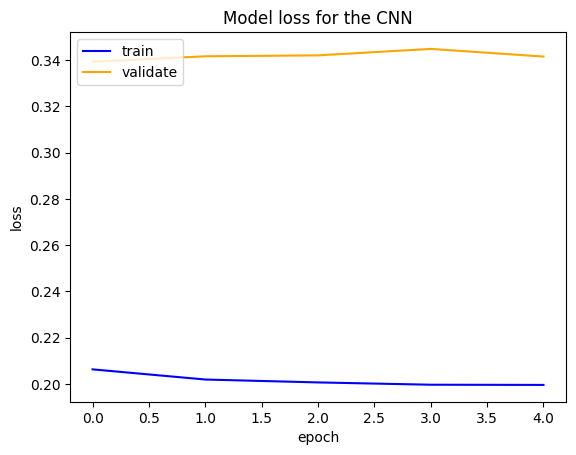

In [95]:
#Plot loss results for training data and testing data
plt.plot(history_CNN_2.history['loss'], 'blue')
plt.plot(history_CNN_2.history['val_loss'], 'orange')
plt.title('Model loss for the CNN')
plt.ylabel('loss')
plt.xlabel('epoch')
plt.legend(['train', 'validate'], loc='upper left')

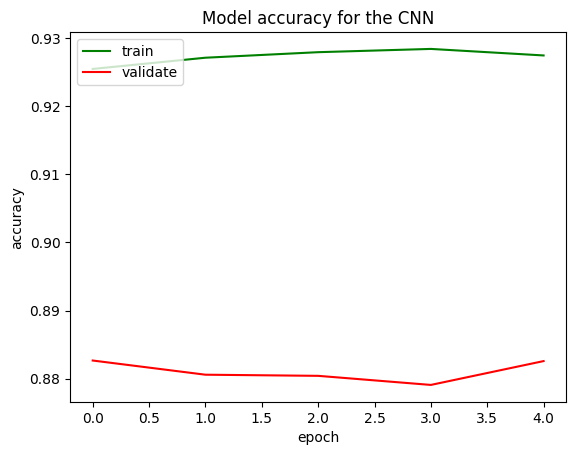

In [96]:
#Plot accuracy results for training data and testing data 
plt.plot(history_CNN_2.history['accuracy'], 'green')
plt.plot(history_CNN_2.history['val_accuracy'], 'red')
plt.title('Model accuracy for the CNN')
plt.ylabel('accuracy')
plt.xlabel('epoch')
plt.legend(['train', 'validate'], loc='upper left')

In [93]:
predictions = model_CNN.predict(test_images)

313/313 [==============================] - 116s 368ms/step


In [97]:
predictions.shape

(10000, 10)

In [98]:
# plot image in a grid
def plot_image(i, predictions_array, true_label, img):
  predictions_array, true_label, img = predictions_array[i], true_label[i], img[i]
  plt.grid(False)
  plt.xticks([])
  plt.yticks([])
  
  plt.imshow(img, cmap=plt.cm.binary)

  predicted_label = np.argmax(predictions_array)
  if predicted_label == true_label:
    color = 'blue'
  else:
    color = 'red'
  
  plt.xlabel("{} {:2.0f}% ({})".format(class_names[predicted_label],
                                100*np.max(predictions_array),
                                class_names[true_label]),
                                color=color)
# plot the value array    
def plot_value_array(i, predictions_array, true_label):
    predictions_array, true_label = predictions_array[i], true_label[i]
    plt.grid(False)
    plt.xticks([])
    plt.yticks([])
    thisplot= plt.bar(range(10), predictions_array, color="#777777")
    plt.ylim([0,1])
    predicted_label = np.argmax(predictions_array)
    
    thisplot[predicted_label].set_color('red')
    thisplot[true_label].set_color('blue')

C:\Users\Serhii\AppData\Local\Temp\ipykernel_6792\2028408509.py:11: MatplotlibDeprecationWarning: Auto-removal of overlapping axes is deprecated since 3.6 and will be removed two minor releases later; explicitly call ax.remove() as needed.
  plt.subplot(num_rows, 2*num_cols, 2*i+1)


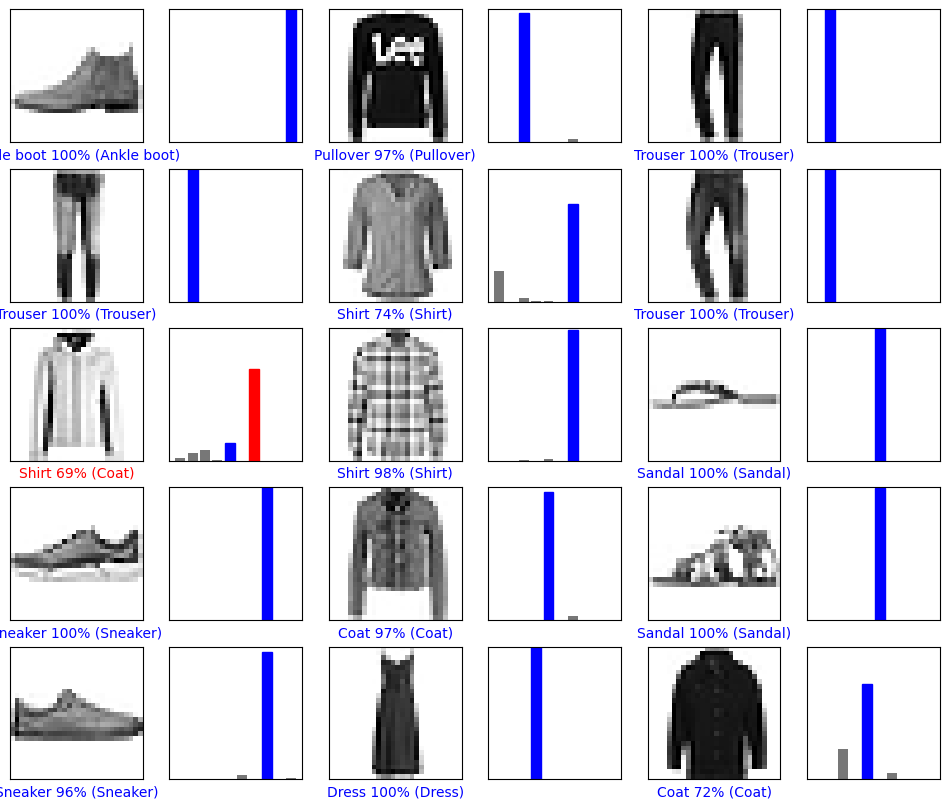

In [99]:
# Plot the first 15 test images, their predicted label, and the true label
# Color correct predictions in blue, incorrect predictions in red
num_rows = 5
num_cols = 3
num_images = num_rows*num_cols

(train_images, train_labels), (test_images, test_labels) = fashion_mnist.load_data()
plt.figure(figsize=(2*2*num_cols, 2*num_rows))
plt.title("Predictions of first 15 images, with NN-12")
for i in range(num_images):
  plt.subplot(num_rows, 2*num_cols, 2*i+1)
  plot_image(i, predictions, test_labels, test_images)
  plt.subplot(num_rows, 2*num_cols, 2*i+2)
  plot_value_array(i, predictions, test_labels)
    

Висновки:
1. Модель VGG16 з feature extraction та  fine-tuning потенційно може досягнути кращого результату ніж звичайна CNN при збільшенні епох навчання
2. Навчання відбувається досить повільно, навіть при зміні гіперпараметрів